### Part 3 - Testing difference between features prioritised by crypto and normal app users

By looking at the p-values for each of the regression models 
and also the interaction variable

[Polynomial Transformation]("https://stackoverflow.com/questions/45828964/how-to-add-interaction-term-in-python-sklearn")  
[Example Linear regression in SKlearn]("https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html")  
[Selecting columns in 2D arrays]("https://stackoverflow.com/questions/41659535/valueerror-x-and-y-must-be-the-same-size")  

In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
# Load in the CSVs
df_crypto = pd.read_csv("sent_crypto.csv", index_col=0)
df_normal = pd.read_csv("sent_normal.csv", index_col=0)

# Create table with the interaction terms
df_crypto["is_crypto"] = 1
df_normal["is_crypto"] = 0

In [3]:
df_crypto

,reviewId,topic,sent_pol,sent_sub,rating,is_crypto
0,a1e76af3-a141-49b3-962e-50a43e6c56c0,A,0.671667,0.671667,5.0,1
1,8d18f2f9-0c5f-476a-be30-768e248d131a,A,0.522222,0.522222,3.0,1
2,9b76db60-591e-4080-83ac-231084066226,O,0.662500,0.662500,5.0,1
3,0c85d52c-453f-4f49-b0fa-82bab680670b,A,0.325000,0.325000,5.0,1
4,b253067e-d4a7-4fc4-8f8d-57e5817f4d71,A,-0.910000,-0.910000,4.0,1
...,...,...,...,...,...,...
4249,36d6caf0-8e03-4898-9248-4358387be0ac,A,-0.104063,-0.104063,1.0,1
4250,ffac6965-3de9-4d5b-9c36-5426d925dd12,A,0.558333,0.558333,5.0,1
4251,5d11a98a-6989-4244-85f2-be72ac295040,A,0.273333,0.273333,5.0,1
4252,e6a22ec1-d0ca-455a-b2aa-28b799fc0972,A,0.352083,0.352083,5.0,1


In [4]:
df_normal

,reviewId,topic,sent_pol,sent_sub,rating,is_crypto
0,748c2355-d884-463b-8c9a-46d9e8cfa1ea,O,0.369333,0.369333,1.0,0
1,40fe5012-ca9d-4aef-bfd5-d1a2b4de3be8,A,-0.022685,-0.022685,5.0,0
2,7444c5dc-8395-4890-9c47-5f690fb6f69b,C,-0.403333,-0.403333,1.0,0
3,ebfb12ca-6ac4-4134-bdd6-335002e8f3d2,A,0.433333,0.433333,5.0,0
4,29e8c8e8-6f05-4b3d-898e-2b2405ae1c7d,A,0.400000,0.400000,5.0,0
...,...,...,...,...,...,...
3428,9bb094d0-5796-40cc-97ae-8e5ef43fafbc,A,-1.000000,-1.000000,1.0,0
3429,c4e82ffa-71ab-4a7b-bf83-9aab29657153,A,0.800000,0.800000,4.0,0
3430,b28ce657-a318-454e-abd7-06d6db719655,A,0.511111,0.511111,5.0,0
3431,35bc4a50-a347-44d8-bdcb-0e259b024e5b,A,0.700000,0.700000,4.0,0


In [5]:
df_all = pd.concat([df_normal, df_crypto], ignore_index=True)
df_all

,reviewId,topic,sent_pol,sent_sub,rating,is_crypto
0,748c2355-d884-463b-8c9a-46d9e8cfa1ea,O,0.369333,0.369333,1.0,0
1,40fe5012-ca9d-4aef-bfd5-d1a2b4de3be8,A,-0.022685,-0.022685,5.0,0
2,7444c5dc-8395-4890-9c47-5f690fb6f69b,C,-0.403333,-0.403333,1.0,0
3,ebfb12ca-6ac4-4134-bdd6-335002e8f3d2,A,0.433333,0.433333,5.0,0
4,29e8c8e8-6f05-4b3d-898e-2b2405ae1c7d,A,0.400000,0.400000,5.0,0
...,...,...,...,...,...,...
7682,36d6caf0-8e03-4898-9248-4358387be0ac,A,-0.104063,-0.104063,1.0,1
7683,ffac6965-3de9-4d5b-9c36-5426d925dd12,A,0.558333,0.558333,5.0,1
7684,5d11a98a-6989-4244-85f2-be72ac295040,A,0.273333,0.273333,5.0,1
7685,e6a22ec1-d0ca-455a-b2aa-28b799fc0972,A,0.352083,0.352083,5.0,1


In [77]:
topic = "D"
df_topic = df_all[df_all["topic"] == topic]
new_frame = {"reviewId":[], "O_pol":[], "A_pol":[], "C_pol":[], "D_pol":[], "F_pol":[], "T_pol":[]}

default_sent = 0
avg = {"O":None, "A":None, "C":None, "D":None, "F":None, }
for key in avg.keys():
    d_frame = df_all.loc[df_all["topic"] == key]
    avg[key] = d_frame["sent_pol"].mean()

# print(avg)

def row_apply(row):
    row["O_pol"] = row["sent_pol"] if row["topic"] == "O" else avg["O"]
    row["A_pol"] = row["sent_pol"] if row["topic"] == "A" else avg["A"]
    row["C_pol"] = row["sent_pol"] if row["topic"] == "C" else avg["C"]
    row["D_pol"] = row["sent_pol"] if row["topic"] == "D" else avg["D"]
    row["F_pol"] = row["sent_pol"] if row["topic"] == "F" else avg["F"]
    # row["T_pol"] = row["sent_pol"] if row["topic"] == "T" else avg["T"]
    return row;

new_frame = df_all.apply(row_apply, axis=1)

new_frame

,reviewId,topic,sent_pol,sent_sub,rating,is_crypto,O_pol,A_pol,C_pol,D_pol,F_pol
0,748c2355-d884-463b-8c9a-46d9e8cfa1ea,O,0.369333,0.369333,1.0,0,0.369333,0.187418,-0.283965,-0.045222,0.01354
1,40fe5012-ca9d-4aef-bfd5-d1a2b4de3be8,A,-0.022685,-0.022685,5.0,0,0.058464,-0.022685,-0.283965,-0.045222,0.01354
2,7444c5dc-8395-4890-9c47-5f690fb6f69b,C,-0.403333,-0.403333,1.0,0,0.058464,0.187418,-0.403333,-0.045222,0.01354
3,ebfb12ca-6ac4-4134-bdd6-335002e8f3d2,A,0.433333,0.433333,5.0,0,0.058464,0.433333,-0.283965,-0.045222,0.01354
4,29e8c8e8-6f05-4b3d-898e-2b2405ae1c7d,A,0.400000,0.400000,5.0,0,0.058464,0.400000,-0.283965,-0.045222,0.01354
...,...,...,...,...,...,...,...,...,...,...,...
7682,36d6caf0-8e03-4898-9248-4358387be0ac,A,-0.104063,-0.104063,1.0,1,0.058464,-0.104063,-0.283965,-0.045222,0.01354
7683,ffac6965-3de9-4d5b-9c36-5426d925dd12,A,0.558333,0.558333,5.0,1,0.058464,0.558333,-0.283965,-0.045222,0.01354
7684,5d11a98a-6989-4244-85f2-be72ac295040,A,0.273333,0.273333,5.0,1,0.058464,0.273333,-0.283965,-0.045222,0.01354
7685,e6a22ec1-d0ca-455a-b2aa-28b799fc0972,A,0.352083,0.352083,5.0,1,0.058464,0.352083,-0.283965,-0.045222,0.01354


In [78]:
# #! Xi = feature of some sample i of all feature set X i.e. Xi = [poli, is_cryptoi]
#! When you add more 0s for each var, explainability for e.g. D_pol goes down
X = new_frame.loc[:, ["D_pol", "A_pol", "C_pol", "D_pol", "F_pol", "is_crypto"]]
Y = new_frame.loc[:, ["rating"]]

In [79]:
X

,D_pol,A_pol,C_pol,D_pol,F_pol,is_crypto
0,-0.045222,0.187418,-0.283965,-0.045222,0.01354,0
1,-0.045222,-0.022685,-0.283965,-0.045222,0.01354,0
2,-0.045222,0.187418,-0.403333,-0.045222,0.01354,0
3,-0.045222,0.433333,-0.283965,-0.045222,0.01354,0
4,-0.045222,0.400000,-0.283965,-0.045222,0.01354,0
...,...,...,...,...,...,...
7682,-0.045222,-0.104063,-0.283965,-0.045222,0.01354,1
7683,-0.045222,0.558333,-0.283965,-0.045222,0.01354,1
7684,-0.045222,0.273333,-0.283965,-0.045222,0.01354,1
7685,-0.045222,0.352083,-0.283965,-0.045222,0.01354,1


In [80]:
Y

,rating
0,1.0
1,5.0
2,1.0
3,5.0
4,5.0
...,...
7682,1.0
7683,5.0
7684,5.0
7685,5.0


In [81]:
# Create interaction variable of degree two between the 7 vars = 7c2 + 7 = 35 
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_tr = poly.fit_transform(X)
X_tr[0] ## 3rd column = POLi * CLASSi

array([-0.04522192,  0.1874178 , -0.28396456, -0.04522192,  0.01354031,
        0.        , -0.00847539,  0.01284142,  0.00204502, -0.00061232,
       -0.        , -0.05322001, -0.00847539,  0.00253769,  0.        ,
        0.01284142, -0.00384497, -0.        , -0.00061232, -0.        ,
        0.        ])

In [82]:
poly.get_feature_names(X.columns)

/root/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['D_pol',
 'A_pol',
 'C_pol',
 'D_pol',
 'F_pol',
 'is_crypto',
 'D_pol A_pol',
 'D_pol C_pol',
 'D_pol D_pol',
 'D_pol F_pol',
 'D_pol is_crypto',
 'A_pol C_pol',
 'A_pol D_pol',
 'A_pol F_pol',
 'A_pol is_crypto',
 'C_pol D_pol',
 'C_pol F_pol',
 'C_pol is_crypto',
 'D_pol F_pol',
 'D_pol is_crypto',
 'F_pol is_crypto']

In [83]:
# Fit the model to the interaction model and get p-value
model = linear_model.LinearRegression()
model.fit(X_tr, Y)
Y_pred = model.predict(X_tr)

In [84]:
X_tr

array([[-0.04522192,  0.1874178 , -0.28396456, ..., -0.00061232,
        -0.        ,  0.        ],
       [-0.04522192, -0.02268519, -0.28396456, ..., -0.00061232,
        -0.        ,  0.        ],
       [-0.04522192,  0.1874178 , -0.40333333, ..., -0.00061232,
        -0.        ,  0.        ],
       ...,
       [-0.04522192,  0.27333333, -0.28396456, ..., -0.00061232,
        -0.04522192,  0.01354031],
       [-0.04522192,  0.35208333, -0.28396456, ..., -0.00061232,
        -0.04522192,  0.01354031],
       [-0.04522192,  0.11770833, -0.28396456, ..., -0.00061232,
        -0.04522192,  0.01354031]])

In [85]:

import statsmodels.api as sm

X2 = sm.add_constant(X_tr)
est = sm.OLS(Y, X2)
est2 = est.fit()
xlabel = ["const"] + poly.get_feature_names(X.columns)
est2.summary(xname=xlabel)

#! Interaction model should include everything that is relevant to the dependent variable
#! i.e. include all 6 things that you use to drive the rating, and see how this differs across two apps
#! for all other online reviews that don't have a sentiment score for a given topic, put 0 to assume neutral sentiment on that particular topic.
#! Make sure to include itneraction variables between all 6 topics 6C2 interaction variables.
# TODO: Include OLS regression results for the combined regression model.
# TODO: have list of words associated with each topic and use NB to associate 
# TODO: How to convert LDA into a text classifier? https://medium.com/analytics-vidhya/text-classification-using-lda-35d5b98d4f05
#! I think the r^2 is lower than before because this time we are considering 7.7k sentences in the sample. whereas in prev we were just considering 64, which we all had data for.
# -> Imputation: use the mean? or 0? 
# TODO: try removing the subjectivity restriction + improving the text classifier so you don't get as much variation which is uncontrolled for 


#! Based on results below it seems that the difference between the two. 
#! I might need to increase the sample size.
#! To address underfitting - look at features/model (from book)
#! Or maybe i'm underfitting e.g. Could use the sigmoid function to fit the scatter plot better.
    #! Rationale: Shift between slightly negatie and slightly positive has a signicant impact on rating.
#! Or is it because that I should use a two tailed t test instead, if just one tail, p-value is 0.052



## https://www.statisticssolutions.com/should-you-use-a-one-tailed-test-or-a-two-tailed-test-for-your-data-analysis/

/root/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     227.6
Date:                Thu, 14 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:02:13   Log-Likelihood:                -14194.
No. Observations:                7687   AIC:                         2.841e+04
Df Residuals:                    7676   BIC:                         2.849e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.9535      0.116     25.407      0.000       2.726       3.181
D_pol               0.1302      0.323      0.403      0.687      -0.503       0.764
A_pol               1.9590      0.064     30.459      0.000       1.833       2.085
C_pol               0.8077      0.377      2.141      0.032       0.068       1.547
D_pol               0.1302      0.323      0.403      0.687      -0.503       0.764
F_pol               1.2239      1.241      0.986      0.324      -1.210       3.657
is_crypto          -0.1860      0.155     -1.201      0.230      -0.490       0.118
D_pol A_pol        -0.0392      0.061     -0.646      0.518      -0.158       0.080
D_pol C_pol        -0.1114      0.093     -1.194      0.233      -0.294       0.072
D_pol D_pol        -1.2245      0.606     -2.022      0.043      -2.412      -0.037
D_pol F_pol        -0.0518      0.056     -0.919      0.358      -0.162       0.059
D_pol is_crypto     0.7625      0.453      1.684      0.092      -0.125       1.650
A_pol C_pol        -0.2477      0.073     -3.400      0.001      -0.391      -0.105
A_pol D_pol        -0.0392      0.061     -0.646      0.518      -0.158       0.080
A_pol F_pol         0.2484      0.233      1.068      0.286      -0.208       0.705
A_pol is_crypto    -0.3669      0.085     -4.338      0.000      -0.533      -0.201
C_pol D_pol        -0.1114      0.093     -1.194      0.233      -0.294       0.072
C_pol F_pol        -0.3252      0.353     -0.923      0.356      -1.016       0.366
C_pol is_crypto     0.4256      0.502      0.848      0.396      -0.558       1.409
D_pol F_pol        -0.0518      0.056     -0.919      0.358      -0.162       0.059
D_pol is_crypto     0.7625      0.453      1.684      0.092      -0.125       1.650
F_pol is_crypto     1.0893      1.617      0.674      0.501      -2.081       4.259
==============================================================================
Omnibus:                     2363.304   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.083
Skew:                          -0.018   Prob(JB):                     4.76e-78
Kurtosis:                       1.946   Cond. No.                     3.30e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

[Interpreting the OLS Regression Results Sheet](https://www.youtube.com/watch?v=U7D1h5bbpcs)

In [109]:
# Regression with single 

# TODOS to potentially improve the p-value
# -> Investigate text classification algorithm to determine if p-value is problematic
# -> Increase sample size to get more texts that are classified into Deposits/withdrawals


### Logistic regression with statsmodels

In [117]:
Y
print(Y["rating"].max())

5.0


In [122]:
import statsmodels.api as sm

# Add constant to X and stnadardise Y for logistic regression
X_logit = sm.add_constant(X_tr)
Y_regular = (Y["rating"] - Y["rating"].min())/(Y["rating"].max()-Y["rating"].min())

# # Build model and fit with data
sm_model = sm.Logit(Y_regular, X_logit).fit()

print(sm_model.summary)

Optimization terminated successfully.
         Current function value: 0.437870
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 rating   No. Observations:                   64
Model:                          Logit   Df Residuals:                       60
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                  0.2290
Time:                        18:32:54   Log-Likelihood:                -28.024
converged:                       True   LL-Null:                       -36.348
Covariance Type:            nonrobust   LLR p-value:                 0.0008350
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1675      0.508     -2.296      0.022      -2.164      -0.171
x1             1.0319      1.191      0.866      0.386      -1.303       3.367
x2             0.2390      0.660      0.362      0.717      -1.055       1.533
x3             2.4917      1.761      1.415      0.157      -0.959       5.943
==============================================================================
"""

In [154]:
independent_var = X_logit[:, 1]
independent_var

array([ 0.        , -0.4375    ,  0.75      ,  0.        ,  0.6       ,
        0.275     ,  0.505     ,  0.35      ,  0.21666667, -0.33333333,
        0.6       , -0.01785714, -0.1       ,  0.        , -0.5       ,
        0.        ,  0.6       , -0.25      , -0.375     ,  0.225     ,
        0.        , -1.        , -0.7       ,  0.65      ,  0.20328526,
        0.05      , -0.5       , -0.03571429,  0.        ,  0.04791667,
        0.375     ,  0.2       , -0.38888889, -0.5       ,  0.19444444,
       -0.8       ,  0.08      , -0.2       , -0.403125  , -0.11      ,
        0.278125  , -0.4       , -0.25      , -0.25      , -0.375     ,
        0.225     , -1.        , -0.7       ,  0.475     , -1.        ,
       -0.33333333,  0.1       ,  0.33333333, -0.5       , -0.5       ,
        0.39444444,  1.        ,  0.25      , -0.8       ,  0.5       ,
        0.4       ,  0.05      , -0.06266667,  0.        ])

Optimization terminated successfully.
         Current function value: 0.598280
         Iterations 5


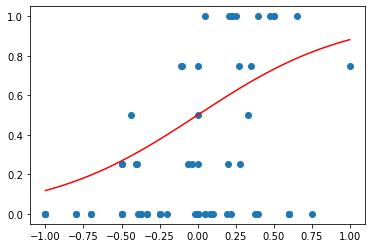

In [159]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

HOW_MANY = 100

# Plot the overall logistic regression model (i.e. without)
logit = sm.Logit(Y_regular,independent_var).fit()

# Make line function set of points s.t. (X=pred_input, Y=predictions)
pred_input = np.linspace(independent_var.min(),independent_var.max(),HOW_MANY)
predictions = logit.predict(pred_input)
plt.scatter(independent_var,Y_regular)
plt.plot(pred_input,predictions,c='red')
plt.show()

#! Not much use for logistic regression - interpretation too complex
#! logistic regression is better for binary classification
#! Use ordinal regression or normal regression
#! Could solve problem but Y = Is-Crypto,not crypto, X = sentiment on deposit/withdrawal.